In [23]:
from os import listdir
import cv2
from tqdm import tqdm

In [24]:
in_img_dir = "./UECFOOD256/1/"
bb_path = in_img_dir + "bb_info.txt"
out_img_dir = "./temp/"

In [25]:
with open(bb_path, "r") as f:
    temp_lst = f.readlines()

In [26]:
temp_lst = [item[:-1] if "\n" in item else item for item in temp_lst]

In [27]:
temp_lst[:5]

['img x1 y1 x2 y2',
 '1 0 143 370 486',
 '2 20 208 582 559',
 '3 2 110 243 410',
 '4 0 237 286 536']

In [28]:
color = (0, 255, 0)  # Зеленый цвет
thickness = 2

In [30]:
img_name_hist = set()

for in_str in tqdm(temp_lst[1:]):
    img_name, x1, y1, x2, y2 = in_str.split(" ")

    img_name = img_name + ".jpg"

    if img_name not in img_name_hist:
        img_name_hist.add(img_path)
        img_path = in_img_dir + img_name
    
    else:
        img_path = out_img_dir + img_name
    

    img = cv2.imread(img_path)

    img = cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)

    cv2.imwrite(out_img_dir + img_name, img)
    
    #break

100%|██████████| 626/626 [00:09<00:00, 63.10it/s] 


In [33]:
# проверим, что в каждой папке уникальные изображения

all_img_names_lst = []

for item in tqdm(listdir("./UECFOOD256/")):
    if ".txt" in item: continue
    img_dir = "./UECFOOD256/" + item + "/"
    for img_item in listdir(img_dir):
        if "txt" in img_item: continue
        all_img_names_lst.append(img_item)

100%|██████████| 258/258 [00:00<00:00, 5235.14it/s]


In [35]:
len(all_img_names_lst) == len(set(all_img_names_lst))

False

In [36]:
len(all_img_names_lst)

31395

In [37]:
len(set(all_img_names_lst))

28897

In [45]:
img_name_hist = set()
names_lst = []
for item in tqdm(listdir("./UECFOOD256/")):
    if ".txt" in item: continue
    img_dir = "./UECFOOD256/" + item + "/"
    
    with open(img_dir + "bb_info.txt", "r") as f:
        temp_lst = f.readlines()
        temp_lst = [item[:-1] if "\n" in item else item for item in temp_lst]
        

    for in_str in temp_lst[1:]:
        img_name, x1, y1, x2, y2 = in_str.split(" ")

        img_name = img_name + ".jpg"

        if img_name not in img_name_hist:
            img_name_hist.add(img_name)
            img_path = img_dir + img_name
    
        else:
            img_path = out_img_dir + img_name
            names_lst.append(img_name)
    

        img = cv2.imread(img_path)
        img = cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)

        cv2.imwrite(out_img_dir + img_name, img)
        
    
            

100%|██████████| 258/258 [05:39<00:00,  1.32s/it]


In [48]:
len(names_lst)

2748

In [49]:
names_lst

['5170.jpg',
 '14348.jpg',
 '14495.jpg',
 '14909.jpg',
 '14920.jpg',
 '15364.jpg',
 '13164.jpg',
 '13182.jpg',
 '14449.jpg',
 '4934.jpg',
 '4953.jpg',
 '903.jpg',
 '97.jpg',
 '998.jpg',
 '87.jpg',
 '80.jpg',
 '978.jpg',
 '4955.jpg',
 '919.jpg',
 '4337.jpg',
 '911.jpg',
 '936.jpg',
 '909.jpg',
 '10617.jpg',
 '10572.jpg',
 '1021.jpg',
 '1037.jpg',
 '1046.jpg',
 '1049.jpg',
 '1050.jpg',
 '959.jpg',
 '14902.jpg',
 '15583.jpg',
 '11615.jpg',
 '14526.jpg',
 '14350.jpg',
 '14287.jpg',
 '14881.jpg',
 '9218.jpg',
 '9117.jpg',
 '9366.jpg',
 '9102.jpg',
 '11186.jpg',
 '14084.jpg',
 '11576.jpg',
 '13203.jpg',
 '15389.jpg',
 '7077.jpg',
 '7046.jpg',
 '1117.jpg',
 '1164.jpg',
 '1176.jpg',
 '1190.jpg',
 '6952.jpg',
 '6955.jpg',
 '7160.jpg',
 '11069.jpg',
 '13961.jpg',
 '13967.jpg',
 '13994.jpg',
 '14606.jpg',
 '15117.jpg',
 '10753.jpg',
 '10968.jpg',
 '10618.jpg',
 '13708.jpg',
 '14700.jpg',
 '13140.jpg',
 '13159.jpg',
 '14689.jpg',
 '14237.jpg',
 '11694.jpg',
 '16000.jpg',
 '13158.jpg',
 '14449.jpg'

In [55]:
res_dct = {}

for item in tqdm(listdir("./UECFOOD256/")):
    if ".txt" in item: continue
    img_dir = "./UECFOOD256/" + item + "/"
    
    with open(img_dir + "bb_info.txt", "r") as f:
        temp_lst = f.readlines()
        temp_lst = [item[:-1] if "\n" in item else item for item in temp_lst]

    for in_str in temp_lst[1:]:
        img_item, x1, y1, x2, y2 = in_str.split(" ")
        if img_item in res_dct:
            res_dct[img_item].append(item)
        else:
            res_dct[img_item] = [item]

100%|██████████| 258/258 [00:00<00:00, 3071.76it/s]


In [56]:
len(res_dct)

28897

In [59]:
res_dct

{'1': ['1', '42'],
 '2': ['1'],
 '3': ['1'],
 '4': ['1'],
 '5': ['1'],
 '6': ['1'],
 '7': ['1'],
 '8': ['1'],
 '9': ['1', '24'],
 '10': ['1'],
 '12': ['1'],
 '13': ['1'],
 '14': ['1', '36'],
 '17': ['1'],
 '18': ['1'],
 '19': ['1', '69', '70'],
 '20': ['1'],
 '21': ['1'],
 '22': ['1', '36', '67', '70'],
 '23': ['1'],
 '24': ['1'],
 '25': ['1', '36', '87'],
 '26': ['1'],
 '27': ['1', '21'],
 '28': ['1', '36', '63', '87'],
 '29': ['1'],
 '30': ['1', '36'],
 '31': ['1', '36', '67'],
 '33': ['1', '36', '60', '69'],
 '34': ['1'],
 '35': ['1'],
 '36': ['1'],
 '37': ['1', '56', '87'],
 '38': ['1', '36', '68', '69'],
 '39': ['1'],
 '41': ['1'],
 '42': ['1'],
 '44': ['1'],
 '45': ['1'],
 '50': ['1'],
 '51': ['1'],
 '52': ['1'],
 '53': ['1'],
 '58': ['1', '36'],
 '59': ['1', '69'],
 '60': ['1'],
 '61': ['1', '36'],
 '62': ['1', '36'],
 '63': ['1'],
 '64': ['1'],
 '65': ['1'],
 '66': ['1'],
 '67': ['1'],
 '68': ['1'],
 '69': ['1'],
 '70': ['1'],
 '71': ['1'],
 '72': ['1', '36', '56'],
 '73': ['1'

In [60]:
res_res_lst = []

for key in res_dct.keys():
    temp_lst = res_dct[key]
    if len(temp_lst) != len(set(temp_lst)):
        res_res_lst.append(key)

In [62]:
len(res_res_lst)

170

In [71]:
res_dct[res_res_lst[0]]

['1', '1', '51']

In [73]:
res_res_lst[0]

'5170'

In [74]:
for key in res_dct.keys():
    temp_lst = res_dct[key]
    if len(temp_lst) != len(set(temp_lst)):
        if len(set(temp_lst)) == 1:
            print(key)

13961
13967
15117
1326
1332
1364
1515
1524
1548
13592
13595
13600
14091
16027
14059
15139
15522
15944
16099
13970
11115
14083
4941
4948
467
11502
12878
12880
12881
12886
12889
12904
10771
7032
7205
7314
10655
10717
10852
10853
10854
10916
11195
11455
11749
11818
11903
11934
11946
12148
14830
12301
12323
12449
12454
12466
12511
12512
12514
12515
12516
12517
12518
12519
12520
12522
12525
12529
12530
12532
12533
12537
12538
12539
12541
12543
12545
12549
12552
12554
12557
14804
14924
14926
14927
14928
14930
14932
14933
14934
14935
14936
14938
14942
14946
14947
14949
12679
15409
15452
15459
15602
13507
13511
13515
13516
13523
13537
13959
14952
14954
14961
12959
12562
12637


In [77]:
res_dct['14059']

['17', '17']

In [80]:
from collections import Counter

In [88]:
lst_lst = []

for key in res_dct.keys():
    temp_lst = res_dct[key]
    if len(temp_lst) != len(set(temp_lst)):
        r = Counter(temp_lst)
        for curr_cls, num in r.items():
            if num > 1:
                lst_lst.append(curr_cls)

In [90]:
Counter(lst_lst).most_common(20)

[('94', 54),
 ('16', 13),
 ('97', 11),
 ('17', 9),
 ('87', 7),
 ('96', 7),
 ('6', 7),
 ('1', 6),
 ('68', 6),
 ('12', 6),
 ('14', 5),
 ('7', 5),
 ('36', 3),
 ('81', 3),
 ('86', 3),
 ('98', 3),
 ('42', 3),
 ('99', 3),
 ('92', 3),
 ('49', 2)]

In [97]:
with open("./UECFOOD256/category.txt", "r") as f:
    ttt = f.readlines()

In [99]:
ttt = [item[:-1] if "\n" in item else item for item in ttt]

In [101]:
names_dct = {item.split("\t")[0]: item.split("\t")[1] for item in ttt[1:]}

C:\Users\DungeonMaster3000\AppData\Local\Temp\ipykernel_8604\677918716.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


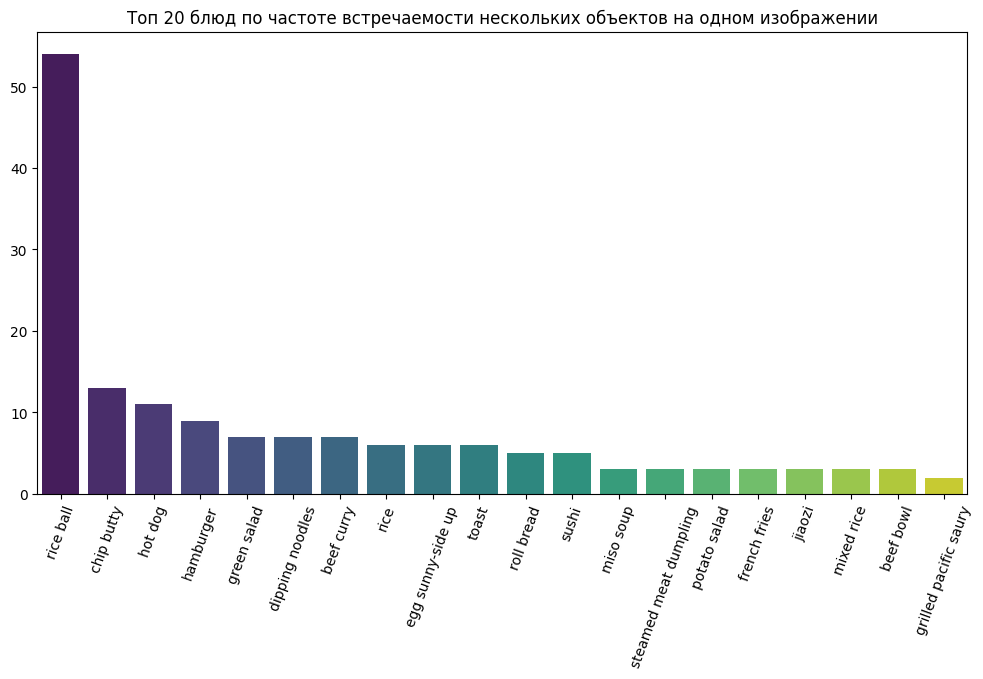

In [104]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

grouped_dishes_cnt = defaultdict(int)
for k, v in Counter(lst_lst).most_common(20):
    k = names_dct[k]
    grouped_dishes_cnt[k] = v

grouped_dishes_cnt_sorted = sorted(grouped_dishes_cnt.items(), key=lambda x: x[1], reverse=True)

x=[x[0] for x in grouped_dishes_cnt_sorted]
y=[x[1] for x in grouped_dishes_cnt_sorted]

plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, palette="viridis")
plt.xticks(rotation=70)
plt.title('Топ 20 блюд по частоте встречаемости нескольких объектов на одном изображении')
plt.show()